# The Spark Foundation

## Task-2

#### @ Abu Bakar Siddik

**Description:** From the given dataset we need to predict the optimum number of clusters and represent it visually. I will be using K-Means Clustering algorithm to solve this task.

In [1]:
# basic library import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
df = pd.read_csv('Iris.csv')

In [3]:
# first 5 rows of the dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# concise summary of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# descriptive statistics of the dataset.
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# checking the null values
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# EDA

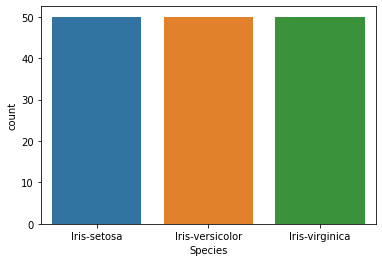

In [7]:
sns.countplot(x = 'Species', data = df);

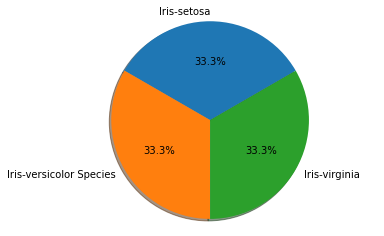

In [8]:
labels = 'Iris-setosa', 'Iris-versicolor Species', 'Iris-virginia'
explode = (0, 0.0, 0.0)

fig, ax = plt.subplots()
ax.pie(df['Species'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=30)
ax.axis('equal')
plt.show()

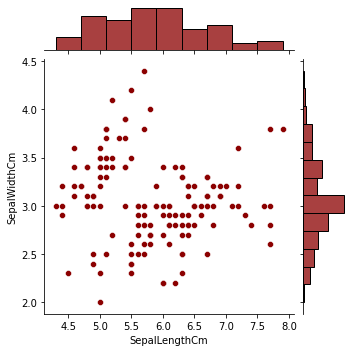

In [9]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data = df, height = 5, color = 'darkred');

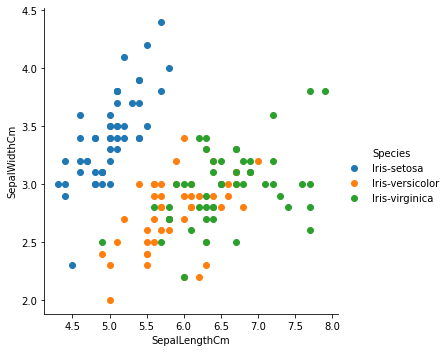

In [10]:
sns.FacetGrid(df, hue="Species", height=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend();

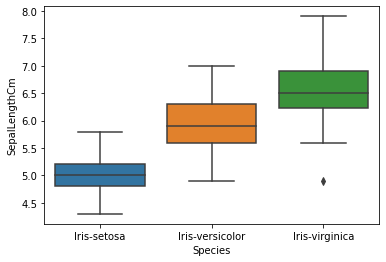

In [11]:
sns.boxplot(x="Species", y="SepalLengthCm", data = df);

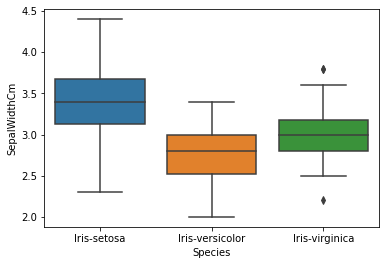

In [12]:
sns.boxplot(x="Species", y="SepalWidthCm", data = df);

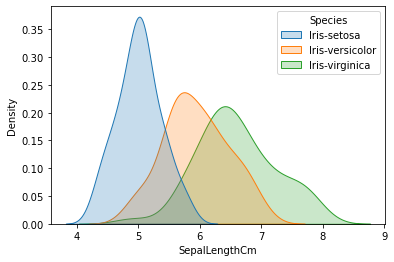

In [13]:
sns.kdeplot(x = 'SepalLengthCm', hue = 'Species', data = df, fill = True);

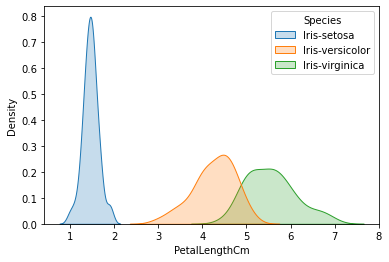

In [14]:
sns.kdeplot(x = 'PetalLengthCm', hue = 'Species', data = df, fill = True);

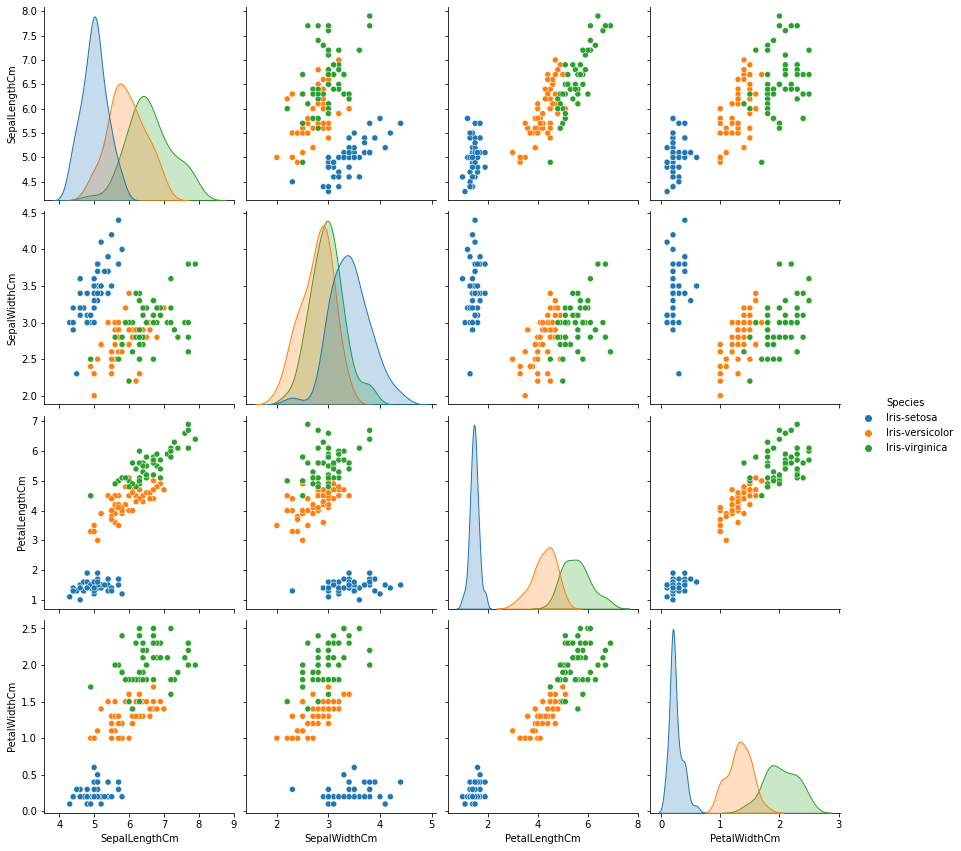

In [15]:
sns.pairplot(df.drop("Id", axis=1), hue="Species", height=3);

# Modeling

In [16]:
x = df.drop(['Id', 'Species'], axis = 1).values

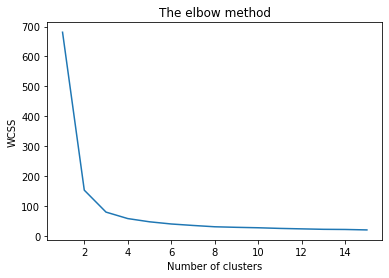

In [17]:
# finding the optimum number of clusters
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 16):
    OMP_NUM_THREADS=1
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 31)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 16), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### Optimum number of cluster is 3

In [18]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 31)
y_kmeans = kmeans.fit_predict(x)

#### Visualising the clusters

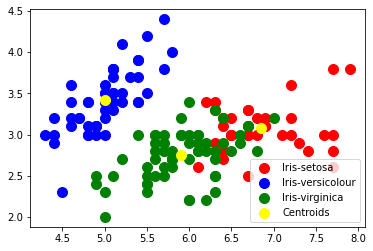

In [19]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend();